#                                 Linear Regression

## Linear Regression Practical implementation on Boston dataset

### Life cycle of Machine learning Project

1.Understanding the Problem Statement
2.Data Collection
3.Exploratory data analysis
4.Data Cleaning
5.Data Pre-Processing
6.Model Training
7.Choose best model

# Data Collection

## importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## importing data

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [8]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### lets prepare dataset

In [10]:
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)

In [11]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### output feature adding 

In [12]:
dataset['Price']=boston.target

In [13]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### check datatype  of features in dataset

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### describe is used for statistics analysis

In [15]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### transpose the describe

In [16]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### check the missing values

In [17]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## relation betweeen independent and dependent feat

In [18]:
## EDA

In [19]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [20]:
# we go with more 95% 

### corr visualization

### Pairplot

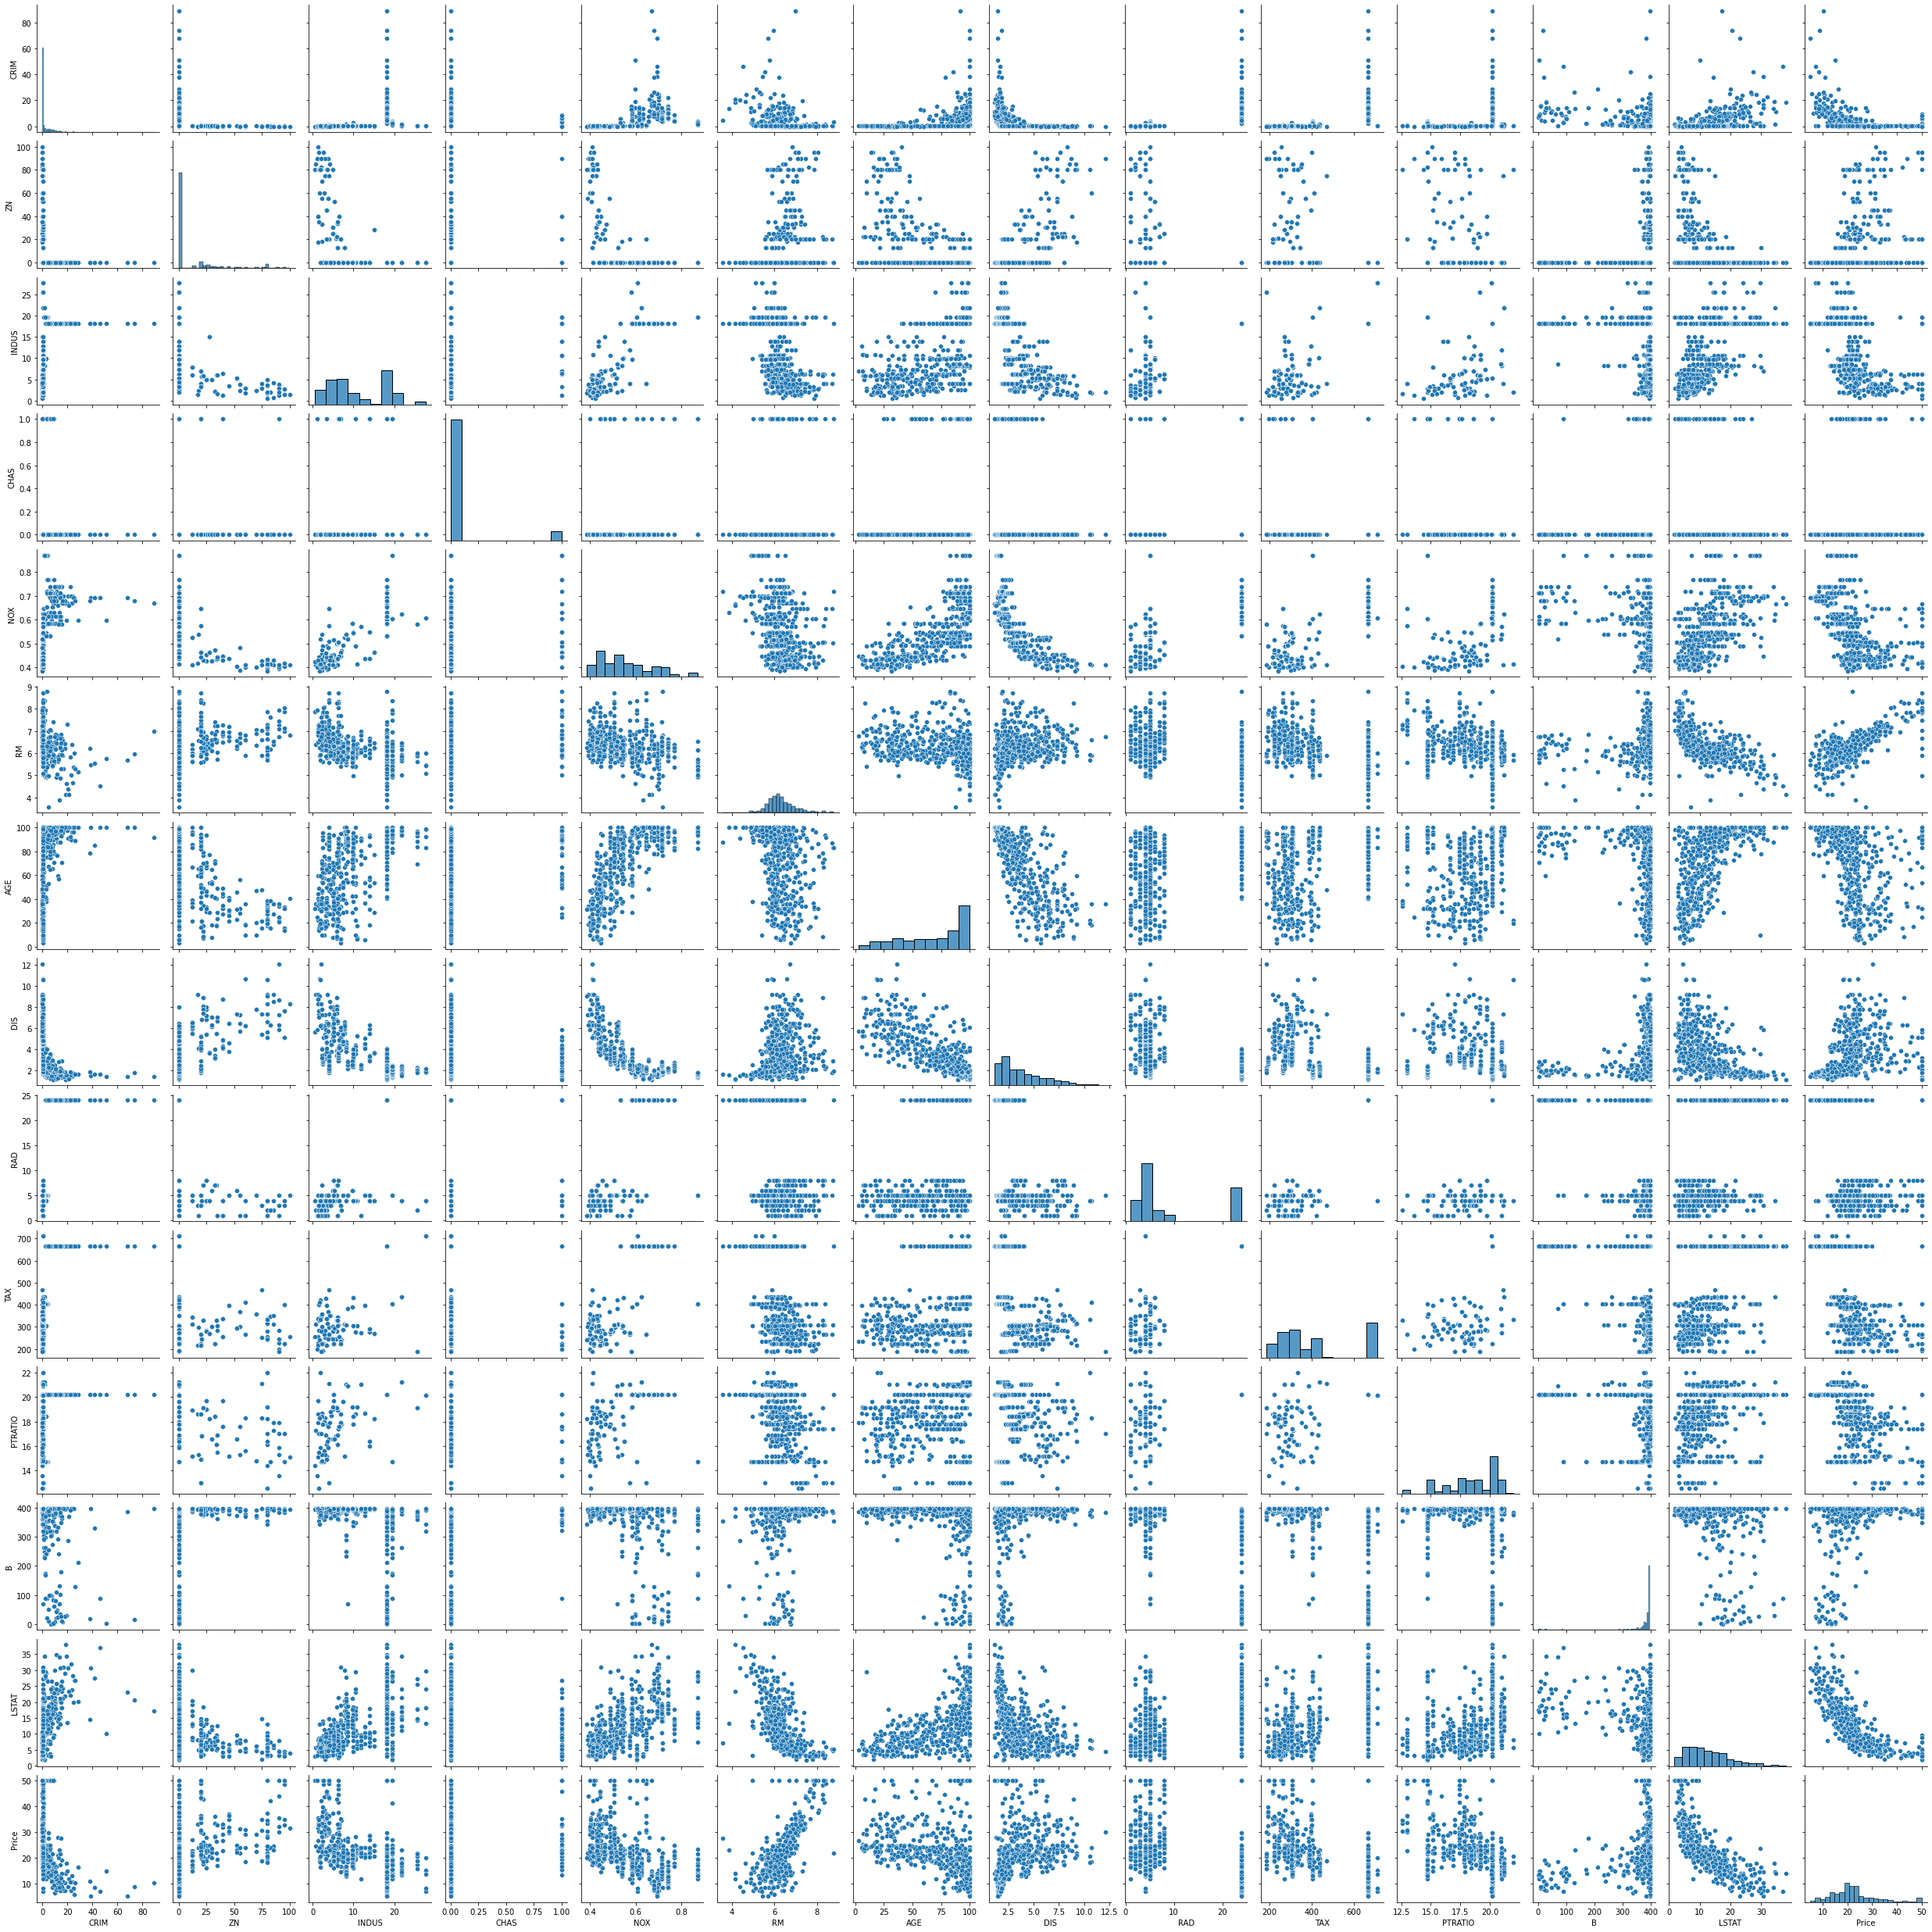

In [21]:
import seaborn as sns
sns.pairplot(dataset)

### Heatmap

<AxesSubplot:>

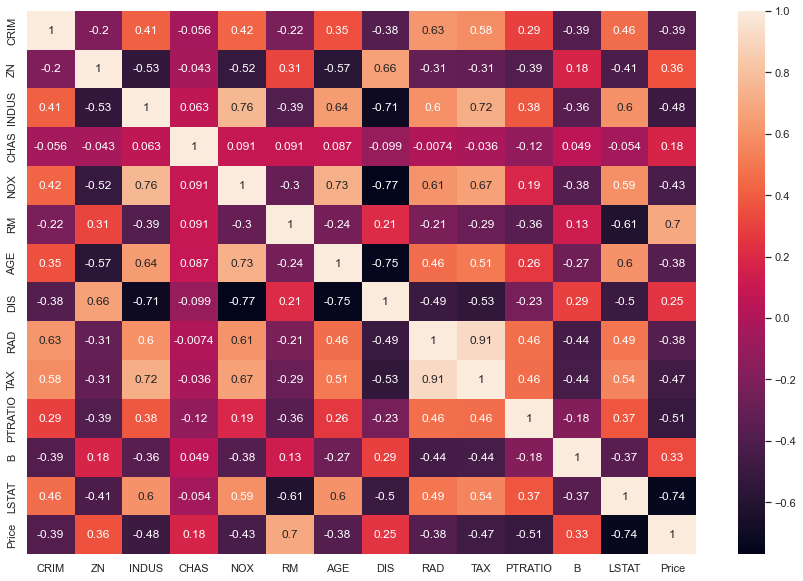

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(dataset.corr(),annot=True)

In [23]:
# price is dependent feature

### Scatter plot

Text(0, 0.5, 'price')

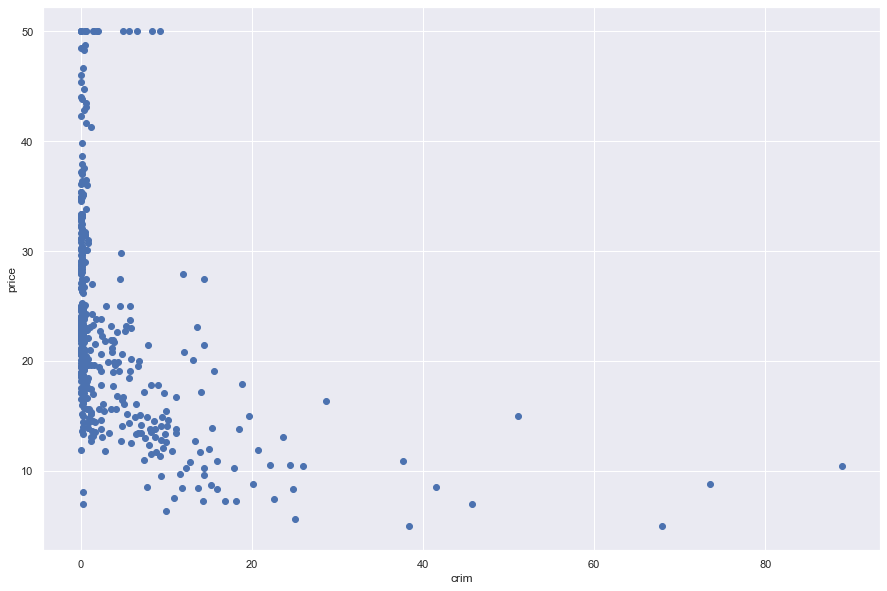

In [24]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("crim")
plt.ylabel("price")

Text(0, 0.5, 'price')

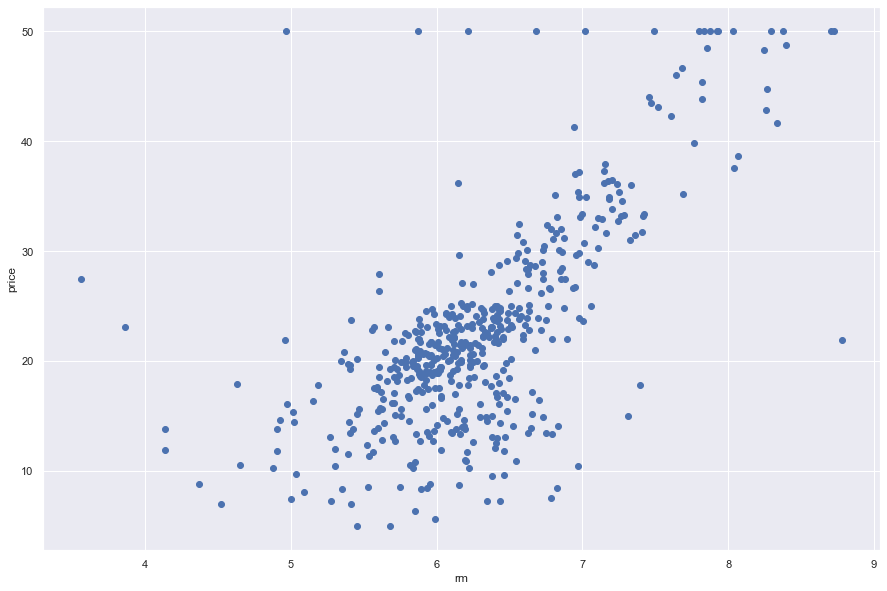

In [25]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("rm")
plt.ylabel("price")

### plot data in linear regression

<AxesSubplot:xlabel='RM', ylabel='Price'>

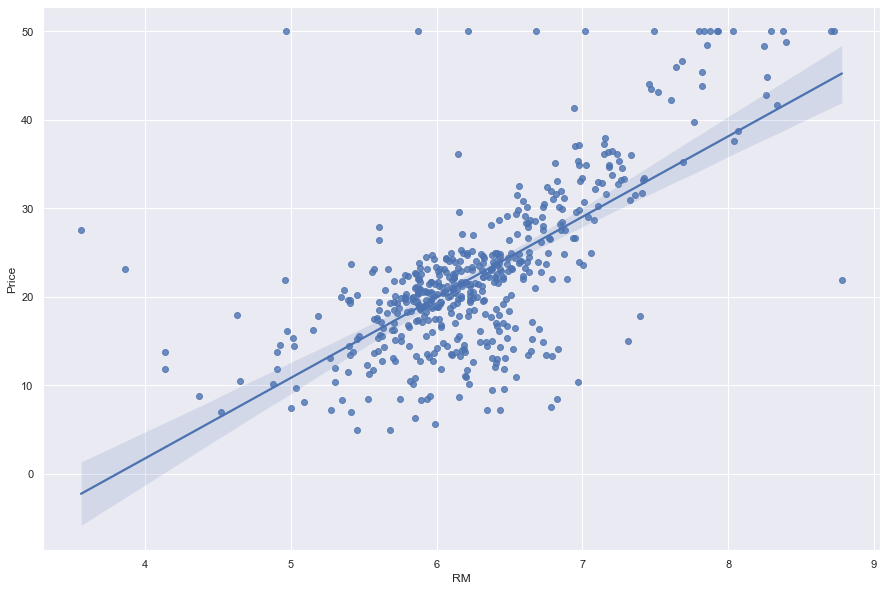

In [26]:
sns.regplot(x="RM",y="Price",data=dataset)

In [27]:
# shaded region  in plot  is redge and lasso
# we see more points is there not shaped mean gap
# other have 
# point is more the shade region is less
# point is less the shade region is high

<AxesSubplot:xlabel='CRIM', ylabel='Price'>

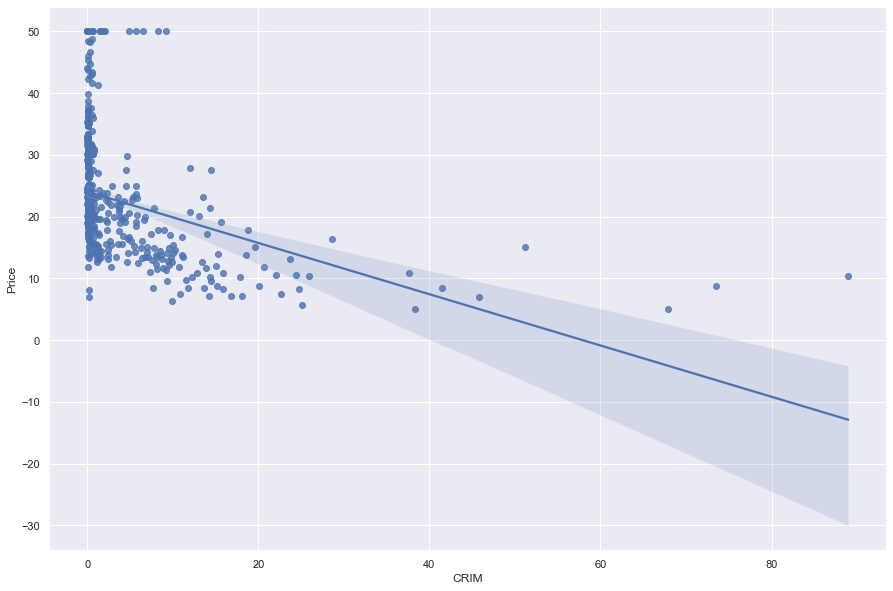

In [28]:
sns.regplot(x="CRIM",y="Price",data=dataset)

### Boxplot

C:\Users\DHARAVATH RAMDAS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

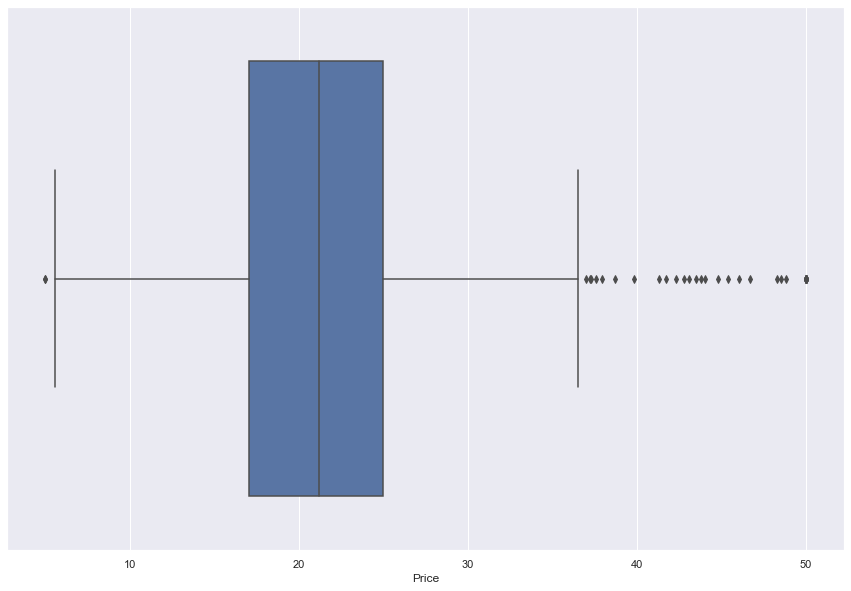

In [29]:
sns.boxplot(dataset["Price"])

C:\Users\DHARAVATH RAMDAS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

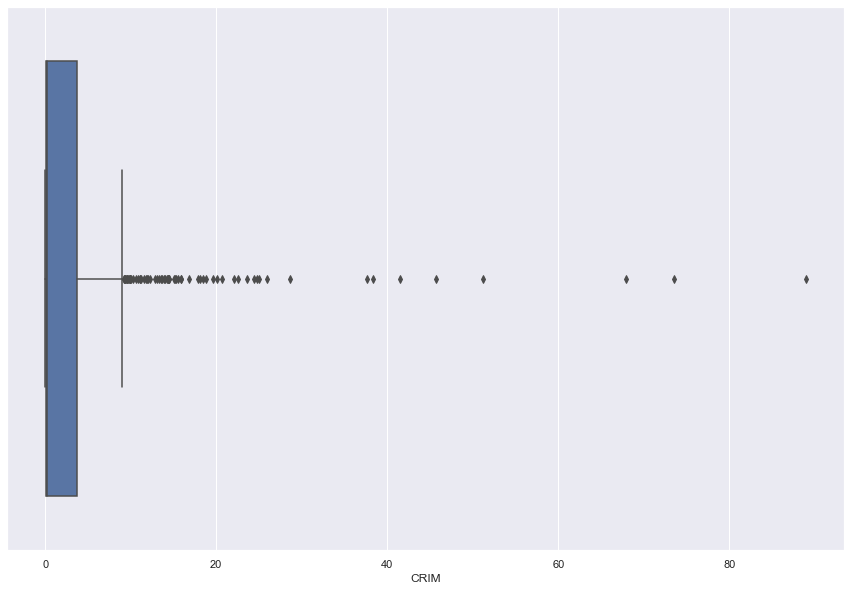

In [30]:
sns.boxplot(dataset['CRIM'])

C:\Users\DHARAVATH RAMDAS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

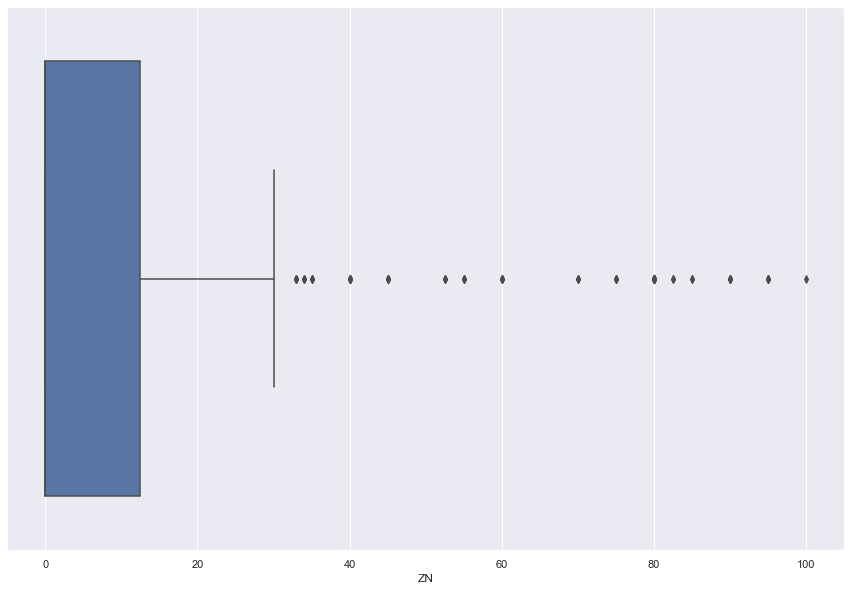

In [31]:
sns.boxplot(dataset['ZN'])

In [32]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## independent  and dependent feature seperation

### independent col

In [33]:
X=dataset.iloc[:,:-1]

### dependent col

In [34]:
y=dataset.iloc[:,-1]

In [35]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

###  spliting the data into train test split

In [37]:
# spliting the data into train test split
# it will return 4 different paremeters
# output feature of x train is y train and x test is y test 
# test size = 0.25   if 1000 in 25% of data 
# random state 

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [40]:
X_train.shape

(339, 13)

In [41]:
y_train.shape

(339,)

In [42]:
X_test.shape

(167, 13)

In [43]:
y_test.shape

(167,)

## Standardize or featur scalling the datasets  

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
scaler

StandardScaler()

### apply data

In [46]:
X_train=scaler.fit_transform(X_train)

In [47]:
X_test=scaler.transform(X_test)

In [48]:
 #data lekage we dont need to leak the data of test to train data
#avoid datalekage use transform
#example :
#    is eaxm paper is x_train if you get before exam is called parer lekage
# f to f' we convert mean and std in fit and transform 

In [49]:
X_test

array([[-0.41664568,  0.87519929, -1.33277144, ..., -0.06616502,
         0.41011193, -0.56391444],
       [-0.42063267,  1.98340973, -1.22498491, ..., -1.36108953,
         0.41021798, -1.11860295],
       [-0.41894074,  2.80430634, -1.16175014, ..., -1.12985301,
         0.44765291, -1.16980497],
       ...,
       [-0.40804678,  1.36773726, -1.15169007, ..., -1.54607875,
         0.29854946, -1.18545003],
       [-0.41098494, -0.47928013,  0.19779729, ...,  0.07257689,
         0.20119741, -0.13154186],
       [-0.37856708, -0.47928013, -0.22328875, ..., -0.06616502,
         0.43482111, -0.5141347 ]])

In [50]:
X_train

array([[-0.13641471, -0.47928013,  1.16787606, ..., -1.77731527,
         0.39261401,  2.36597873],
       [-0.41777807, -0.47928013, -1.18043314, ..., -0.75987458,
         0.14721899, -0.54115799],
       [ 1.31269177, -0.47928013,  0.95517731, ...,  0.76628645,
         0.19334986,  2.52100705],
       ...,
       [-0.13520965, -0.47928013,  0.95517731, ...,  0.76628645,
         0.17012536,  0.06331026],
       [-0.40281114, -0.47928013,  2.04022838, ...,  0.25756611,
         0.32166792,  0.27238516],
       [-0.33104058,  0.34161649, -1.07552092, ..., -2.56351944,
         0.39993132, -0.34772815]])

## Model Training

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regression=LinearRegression()

In [53]:
regression

LinearRegression()

In [54]:
# fit data and transform
# only fir only apply 
# x trian indepe y tai n is dependent 

In [55]:
regression.fit(X_train,y_train)

LinearRegression()

## Coefficient and intercept

In [56]:
## print the coefficient and the intercept
## price 1 unit is increse crime is decrease relation

# coefficient

In [57]:
print(regression.coef_)

[-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]


# intercept

In [58]:
print(regression.intercept_)

22.077286135693214


## prediction for the test data

In [59]:
reg_pred = regression.predict(X_test)

In [60]:
reg_pred

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

## Assumption of linear regression

In [61]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and 
# 2.residuals we get normal distribution
# 3 get uniform distribution

### 1.linear relationship between y_test and reg_prediction

Text(0, 0.5, 'test predicted data')

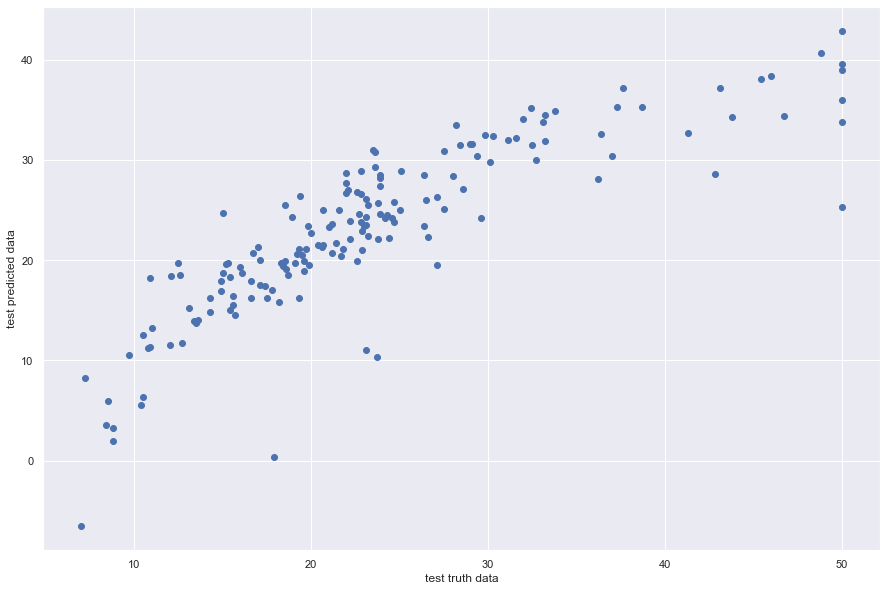

In [62]:
plt.scatter(y_test,reg_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

### 2.residual we get normal distributin

In [63]:
residuals=y_test-reg_pred
residuals

305   -3.038496
193   -0.887944
65    -7.498956
349    4.286033
151    0.705072
         ...   
442   -1.004380
451   -4.387684
188   -2.638009
76    -2.661709
314   -1.885761
Name: Price, Length: 167, dtype: float64

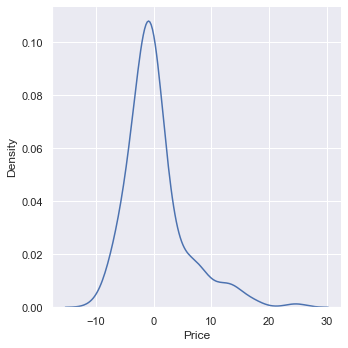

In [64]:
sns.displot(residuals,kind="kde")

### 3.uniform distributin

In [65]:
## scatter plot with prediction and residual
## uniform distribution  called below plot

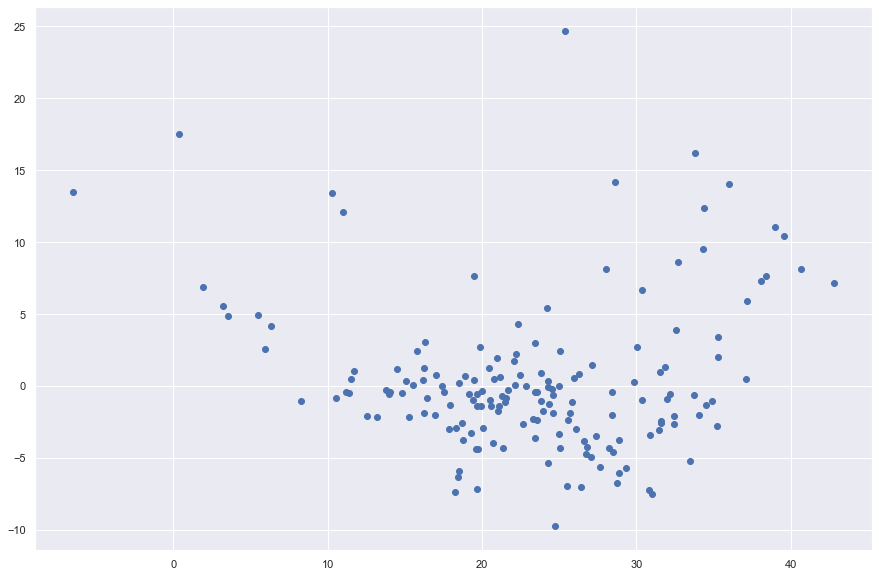

In [66]:
plt.scatter(reg_pred,residuals)

# Mean_squared_error, Mean_absolute_error

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

27.100991709962493
3.520658529879791
5.205861284164465


## Performance metrics

### R squared and adjusted R square

#### R squared 

In [68]:
from sklearn.metrics import r2_score
linear_score=r2_score(y_test,reg_pred)
print(linear_score)

0.7165219393967555


#### Adjusted R Squared

In [69]:
#### adjusted R square
#### display adjusted R-squared

In [70]:
1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6924355682343882

# Ridge Regression:-

In [71]:
# importing ridge regression from sklearn library
from sklearn.linear_model import Ridge

## Train the Model

In [72]:
# Train the model
ridgeR = Ridge(alpha=.99)
ridgeR.fit(X_train,y_train)

Ridge(alpha=0.99)

# Coefficients and intercepts

In [73]:
# coefficient

In [74]:
print(ridgeR.coef_)

[-1.27580076  1.5822088  -0.16122045  0.37668477 -1.72424166  2.24417936
  0.30969509 -3.26445939  2.60370907 -2.00010928 -1.75207382  1.25004819
 -3.81475273]


In [75]:
# intercepts

print(ridgeR.intercept_)

22.077286135693214


## prediction for test data

In [76]:
ridgeR_pred = ridgeR.predict(X_test)
ridgeR_pred

array([31.33057488, 31.98187113, 30.96557336, 22.44979345, 18.93136096,
       16.21766097, 35.9695201 , 14.84502334, 25.00681679, 37.08865709,
       21.49611307, 30.86418833, 27.98870994, 33.98311439, 33.72761124,
       40.61765149, 24.27260265, 23.3396092 , 25.52874965, 21.42633474,
       32.687195  , 17.88580074, 25.50287525, 25.01789638, 32.58713523,
       20.48525253, 19.5157083 , 16.94085284, 38.35830043,  0.3359304 ,
       32.44395443, 32.10396125, 26.13535705, 23.81366531, 20.64418441,
       19.71806618,  3.56120622, 35.17406836, 27.02047743, 27.65050098,
       34.34092247, 29.77294057, 18.39839475, 31.55299939, 17.92572438,
       28.51396241, 19.49629399, 21.65556993, 38.03647563, 16.4768963 ,
       24.5632252 , 19.66078388, 24.49101977, 34.33486274, 26.74628864,
       34.83754441, 21.08503023, 19.88392682, 18.65848344, 24.71541141,
       20.00211437, 23.58561577, 39.60661267, 42.79568807, 30.35504889,
       17.07390321, 23.8441424 ,  3.23179317, 31.42616831, 28.74

## Asumptions for ridgeRegression

### 1.linear relationship between y_test and reg_prediction

Text(0, 0.5, 'test predicted data')

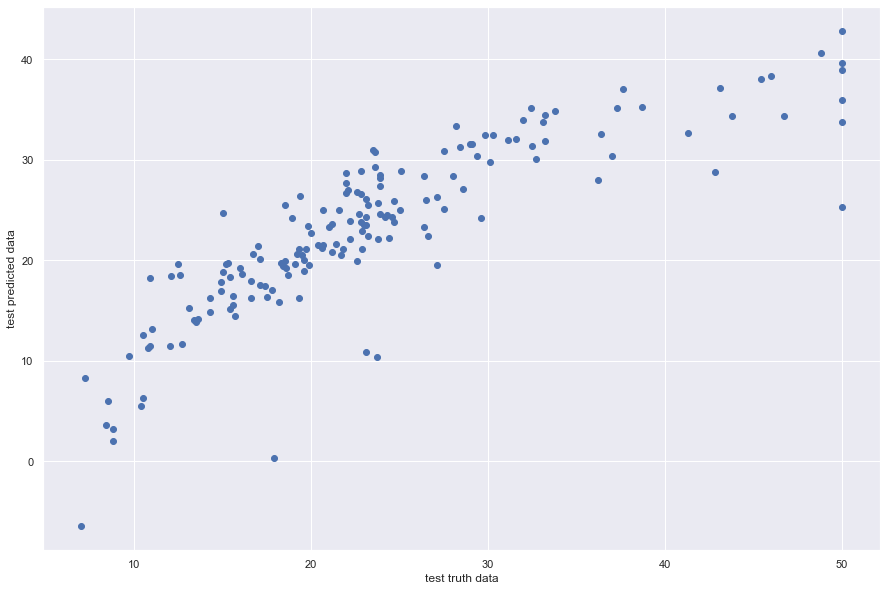

In [77]:
plt.scatter(y_test,ridgeR_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

### 2.residual we get normal distributin

In [78]:
residuals=y_test-ridgeR_pred
residuals

305   -2.930575
193   -0.881871
65    -7.465573
349    4.150207
151    0.668639
         ...   
442   -0.994611
451   -4.392029
188   -2.629588
76    -2.670899
314   -1.883786
Name: Price, Length: 167, dtype: float64

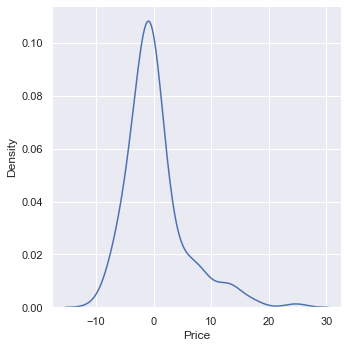

In [79]:
sns.displot(residuals,kind="kde")

### 3.uniform distributin
#### scatter plot with prediction and residual
#### uniform distribution  called below plot

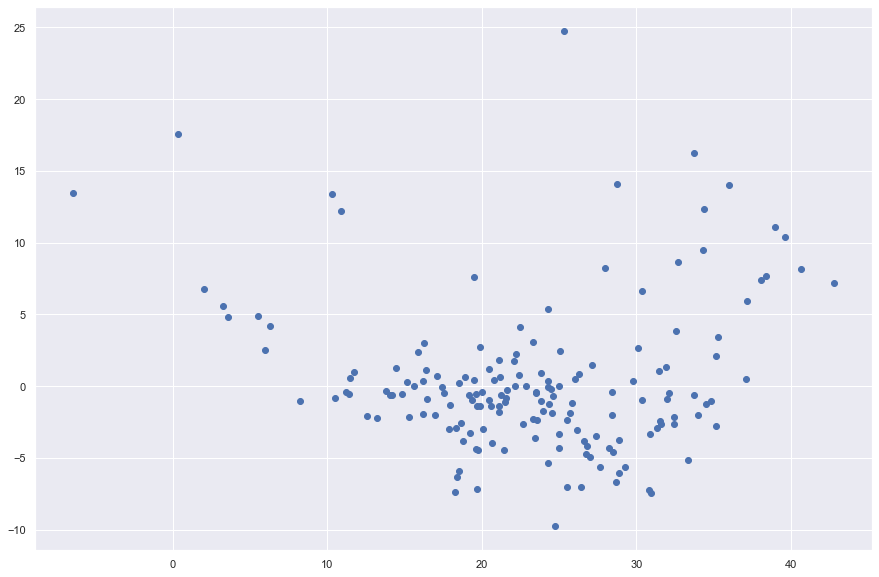

In [80]:
plt.scatter(ridgeR_pred,residuals)

# Performance Matrics

In [81]:
# mean squared error , mean absolute error , root mean square error

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridgeR_pred))
print(mean_absolute_error(y_test,ridgeR_pred))
print(np.sqrt(mean_squared_error(y_test,ridgeR_pred)))

27.076711766488984
3.516149635367478
5.203528780211462


### R Square

In [83]:
from sklearn.metrics import r2_score
ridgeR_score = r2_score(y_test,ridgeR_pred)
print(ridgeR_score)

0.7167759091171659


### Adjusted R Square

In [84]:
1 - (1-ridgeR_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6927111170813696

# Lasso Regression:-

In [85]:
# import lasso regression from sklearn library

In [86]:
from sklearn.linear_model import Lasso

## Train the model

In [87]:
lasso = Lasso(alpha = 0.05)
lasso.fit(X_train,y_train)

Lasso(alpha=0.05)

# coefficient and intercept

In [88]:
# coefficient 

In [89]:
print(lasso.coef_)

[-1.1362951   1.39694799 -0.15032956  0.36283533 -1.44054618  2.34832732
  0.08736711 -2.99867466  1.97095926 -1.50608266 -1.68128859  1.21430748
 -3.76284248]


In [90]:
# intercept

In [91]:
print(lasso.intercept_)

22.077286135693214


## predict lasso

In [92]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([30.57855402, 32.04704681, 30.7836755 , 23.22473341, 19.31928679,
       16.31947881, 36.04756378, 15.14089993, 24.54690088, 36.75657835,
       21.40934745, 30.42914651, 27.51095643, 33.62846912, 33.51369108,
       40.35412747, 24.74380038, 22.64379453, 25.44641771, 21.94003238,
       32.63731951, 17.88286672, 25.46744211, 25.20808824, 32.88728015,
       20.51622533, 19.37852914, 17.08461594, 38.00682559,  0.06256954,
       32.39077209, 31.71723378, 26.30318902, 24.1901777 , 20.3564376 ,
       19.84503741,  3.86980824, 34.72575591, 27.02264842, 27.47090983,
       34.53116392, 29.31157273, 18.25916767, 31.51857148, 17.73102663,
       28.47466208, 19.54285003, 21.45175703, 37.5908217 , 16.49354151,
       24.5126893 , 19.48032315, 24.10857748, 34.59994156, 26.81233855,
       34.46731518, 21.20314923, 19.9936519 , 18.68266087, 24.75076636,
       20.37856907, 23.69939752, 39.77095878, 42.55019349, 30.379202  ,
       17.38116342, 24.21711232,  3.12416695, 30.75349905, 29.62

## Assumption of LassoRegression

In [93]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and 
# 2.residuals we get normal distribution
# 3 get uniform distribution

In [94]:
# 1.relationship between real data and predict data

Text(0, 0.5, 'test predicted data')

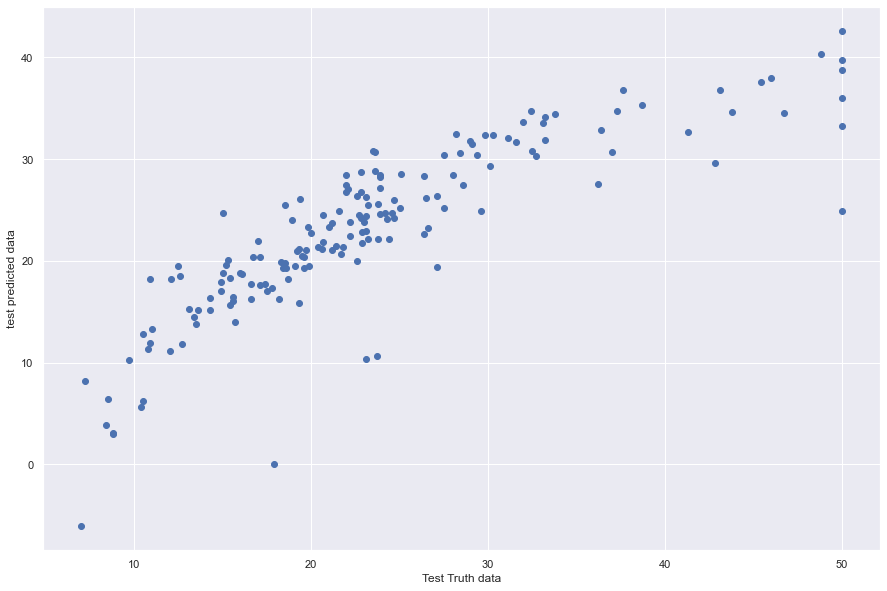

In [95]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth data")
plt.ylabel("test predicted data")

In [96]:
# 2.calculate the residual

In [127]:
residuals = y_test-lasso_pred
residuals

305   -2.178554
193   -0.947047
65    -7.283676
349    3.375267
151    0.280713
         ...   
442   -0.886966
451   -4.363615
188   -2.587938
76    -2.692050
314   -1.820302
Name: Price, Length: 167, dtype: float64

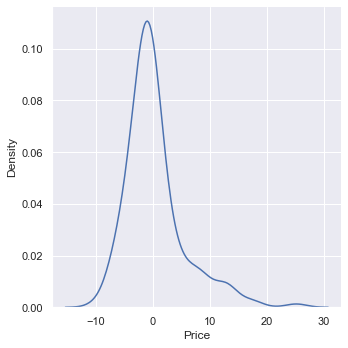

In [128]:
sns.displot(residuals,kind='kde')

In [129]:
# 3 get uniform distribution

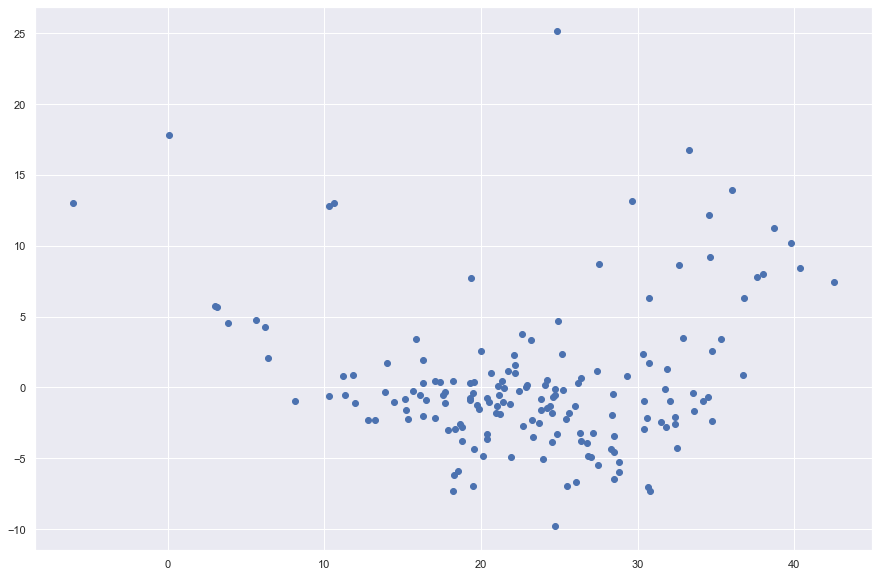

In [130]:
plt.scatter(lasso_pred,residuals)

# Performance Matrics

In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

26.891235686064327
3.4901509037901235
5.185676010518236


### R Square

In [104]:
from sklearn.metrics import r2_score
lasso_score = r2_score(y_test,lasso_pred)
print(lasso_score)

0.7187160004662122


### Adjusted R Square

In [105]:
1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6948160527934066

# ElasticNet Regression

In [106]:
# import model

In [107]:
from sklearn.linear_model import ElasticNet

## Train the model

In [108]:
el_net = ElasticNet(alpha=.02,l1_ratio=.2)
el_net.fit(X_train,y_train)

ElasticNet(alpha=0.02, l1_ratio=0.2)

## coefficient and intercept

In [109]:
#coefficient

In [110]:
print(el_net.coef_)

[-1.20552262  1.46094793 -0.23215955  0.393075   -1.55138849  2.31437091
  0.24113825 -3.04649334  2.19062072 -1.64162732 -1.71126882  1.23818913
 -3.72782837]


In [111]:
# intercept

In [112]:
print(el_net.intercept_)

22.077286135693214


## prediction

In [113]:
elastic_pred = el_net.predict(X_test)
elastic_pred

array([30.85320392, 31.95227044, 30.80930105, 23.0311917 , 19.10356298,
       16.24600244, 35.87472708, 14.9895382 , 24.82885226, 36.89115631,
       21.4886189 , 30.73150696, 27.67922031, 33.66227778, 33.58606909,
       40.49230464, 24.43871474, 23.00271234, 25.46496544, 21.7949502 ,
       32.5439557 , 17.8971736 , 25.50064893, 25.06306784, 32.76489368,
       20.48825102, 19.63035066, 17.00997366, 38.22052183,  0.23782986,
       32.49185944, 31.87233767, 26.27375723, 23.9223078 , 20.50068616,
       19.81219508,  3.81973163, 34.78789885, 26.9037553 , 27.57428463,
       34.30221555, 29.5059595 , 18.34458072, 31.47505857, 17.96071003,
       28.54751586, 19.50966375, 21.47597087, 37.76635394, 16.61030726,
       24.46653295, 19.57476414, 24.27600651, 34.43751694, 26.73386342,
       34.63692279, 21.16421431, 19.90817887, 18.5488929 , 24.69397623,
       20.16910225, 23.67112496, 39.70500876, 42.65458117, 30.27897294,
       17.23152662, 23.90157845,  3.20344734, 31.05847458, 29.26

## Assumptions of ElasticsNetRegression

In [114]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and predicted 
# 2.residuals we get normal distribution
# 3 get uniform distribution

In [115]:
# 1.relationship between actual y test and predicted 

Text(0, 0.5, 'test predicted data')

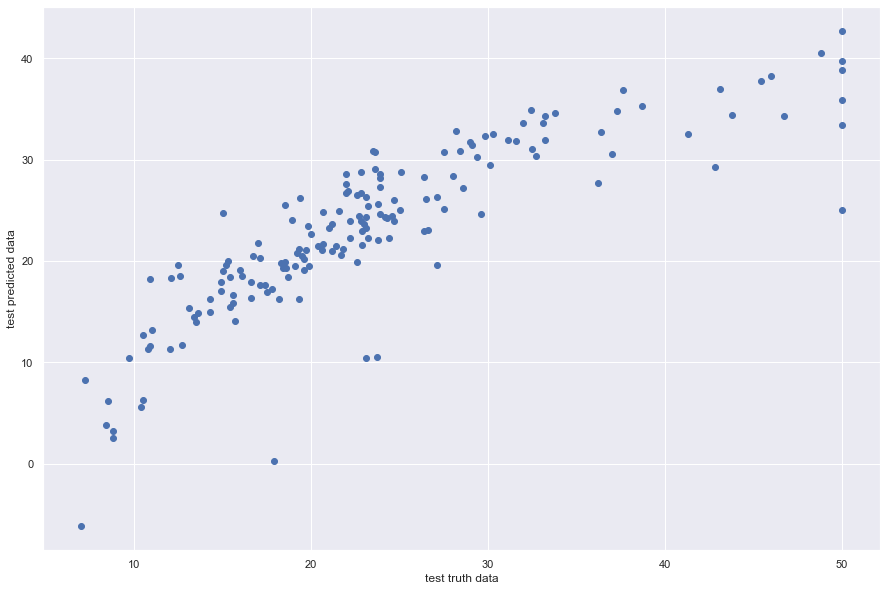

In [116]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

In [117]:
# 2.residual

In [118]:
residuals = y_test - elastic_pred
residuals

305   -2.453204
193   -0.852270
65    -7.309301
349    3.568808
151    0.496437
         ...   
442   -0.947594
451   -4.407735
188   -2.561610
76    -2.697294
314   -1.865516
Name: Price, Length: 167, dtype: float64

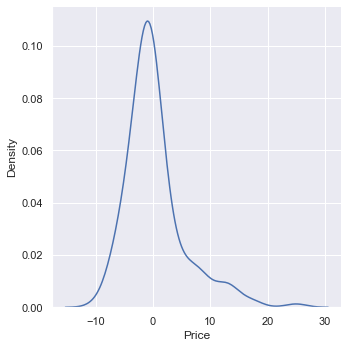

In [119]:
sns.displot(residuals,kind='kde')

In [120]:
# 3.uniform distribution

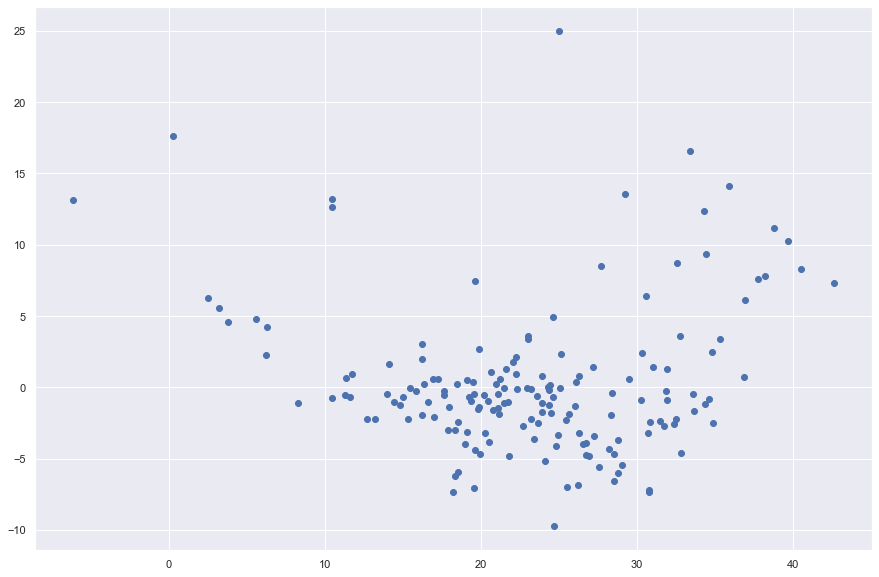

In [126]:
plt.scatter(elastic_pred,residuals)

# Performance Matrics

In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

27.000688509169624
3.498561559790622
5.196218674110013


### R Square 

In [131]:
from sklearn.metrics import r2_score
elastic_score = r2_score(y_test,elastic_pred)
print(elastic_score)

0.7175711171219605


### Adjusted R Square

In [132]:
1 - (1-elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.693573891779382